In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [3]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Saving caa.jpeg to caa (2).jpeg


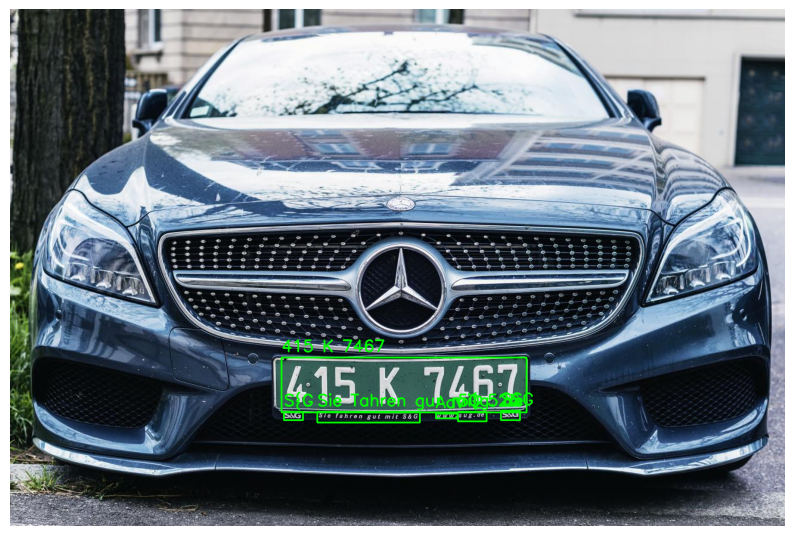

In [13]:


import easyocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files


reader = easyocr.Reader(['fr'])


def read_and_annotate(image_path):
    # Charger l'image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read image {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    results = reader.readtext(gray)

    for (bbox, text, prob) in results:

        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = (int(top_left[0]), int(top_left[1]))
        bottom_right = (int(bottom_right[0]), int(bottom_right[1]))


        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(img, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


uploaded = files.upload()

for filename in uploaded.keys():
    read_and_annotate(filename)
